**Sentiment Classification**

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLYDJ0J/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLYDJ0J/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLYDJ0J/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train_data, test_data = imdb['train'], imdb['test']

In [ ]:
#Sentences
train_sentences = []
test_sentences = []

# Labels
train_labels = []
test_labels = []

for s, l in train_data: 
  train_sentences.append(str(s.numpy()))
  train_labels.append(l.numpy())

for s, l in test_data: 
  test_sentences.append(str(s.numpy()))
  test_labels.append(l.numpy())

In [ ]:
print(train_sentences[0])
print()
print(train_labels[0])

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

0


In [ ]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
vocab_size = 10000
embedding_dimension = 64
max_length = 140

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>") #OOV: Out of vocabulary
tokenizer.fit_on_texts(train_sentences)

In [ ]:
# which text appear first will have lower index
tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'with': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 "'s": 21,
 'on': 22,
 'you': 23,
 'not': 24,
 'are': 25,
 'his': 26,
 'he': 27,
 'have': 28,
 'be': 29,
 'one': 30,
 'all': 31,
 'at': 32,
 'by': 33,
 'they': 34,
 'an': 35,
 'who': 36,
 'so': 37,
 'from': 38,
 'like': 39,
 'her': 40,
 "'t": 41,
 'or': 42,
 'just': 43,
 'there': 44,
 'about': 45,
 'out': 46,
 "'": 47,
 'has': 48,
 'if': 49,
 'some': 50,
 'what': 51,
 'good': 52,
 'more': 53,
 'very': 54,
 'when': 55,
 'she': 56,
 'up': 57,
 'can': 58,
 'b': 59,
 'time': 60,
 'no': 61,
 'even': 62,
 'my': 63,
 'would': 64,
 'which': 65,
 'story': 66,
 'only': 67,
 'really': 68,
 'see': 69,
 'their': 70,
 'had': 71,
 'were': 72,
 'me': 73,
 'well': 74,
 'we': 75,
 'than': 76,
 'much': 77,
 'been': 78,
 'get': 79,
 'bad': 80,
 'will': 81,
 'people': 82,
 'do': 83,

In [ ]:
# Convert to sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences) 

In [ ]:
padded_train_sequences = pad_sequences(train_sequences, 
                                       maxlen=max_length, # Set the word's max length
                                       truncating='post', # Delete from last if exceed length
                                       padding='post' # Fill 0s in last 
                                       )
padded_train_sequences

array([[  59,   12,   14, ...,    0,    0,    0],
       [ 256,   28,   78, ...,    0,    0,    0],
       [   1, 6175,    2, ...,    0,    0,    0],
       ...,
       [7629,   37,   11, ..., 2743,   21, 1563],
       [2677,   11,  216, ..., 1048,   37,   31],
       [3875,    5,   31, ...,    1, 2238,   42]], dtype=int32)

In [ ]:
padded_train_sequences.shape

(25000, 140)

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, truncating='post', padding='post')
padded_test_sequences.shape

(25000, 140)

# 2. Build model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [ ]:
model = Sequential()

#Embedding_size = 10000
model.add(Embedding(vocab_size, embedding_dimension, input_length=max_length))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 140, 64)           640000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 8960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                89610     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 729,621
Trainable params: 729,621
Non-trainable params: 0
_________________________________________________________________


Explaining Embedding

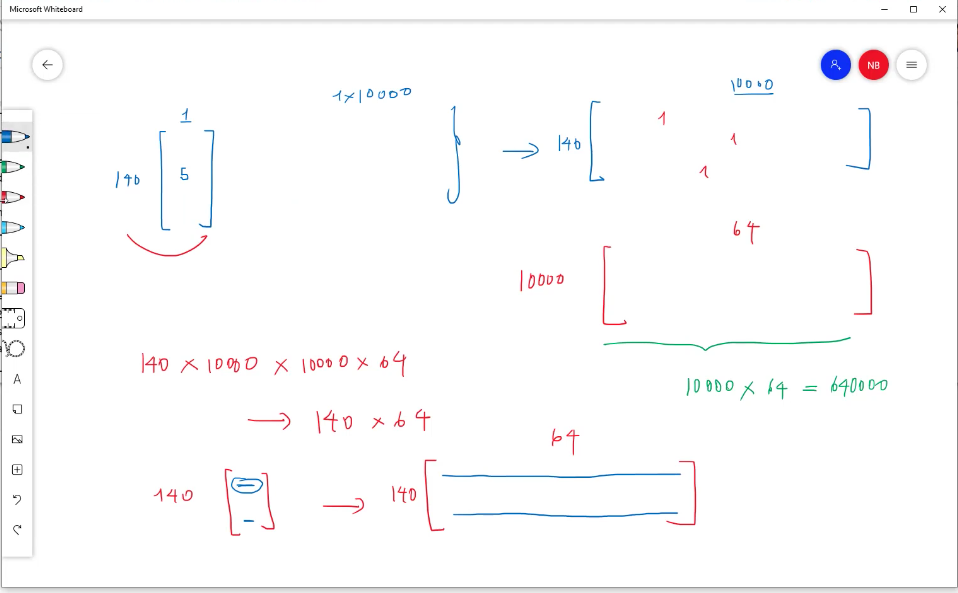

Explaining Dense and Flatten

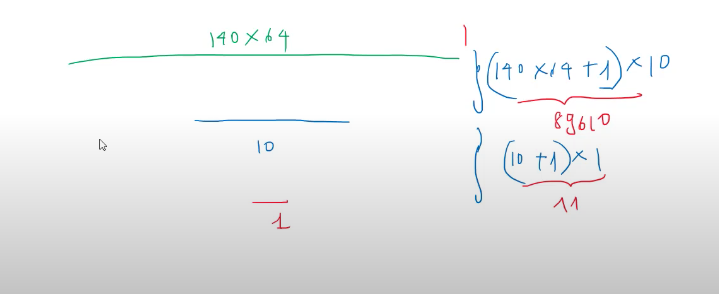

# Train model

In [ ]:
model.fit(padded_train_sequences, train_labels, epochs=10, validation_data=(padded_test_sequences, test_labels))

Epoch 1/10
782/782 [==============================] - 10s 13ms/step - loss: 0.4540 - accuracy: 0.7682 - val_loss: 0.3736 - val_accuracy: 0.8294
Epoch 2/10
782/782 [==============================] - 10s 12ms/step - loss: 0.1313 - accuracy: 0.9567 - val_loss: 0.4708 - val_accuracy: 0.8098
Epoch 3/10
782/782 [==============================] - 10s 12ms/step - loss: 0.0148 - accuracy: 0.9979 - val_loss: 0.5637 - val_accuracy: 0.8165
Epoch 4/10
782/782 [==============================] - 10s 12ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.6157 - val_accuracy: 0.8186
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 6.1509e-04 - accuracy: 1.0000 - val_loss: 0.6527 - val_accuracy: 0.8217
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 3.0804e-04 - accuracy: 1.0000 - val_loss: 0.6859 - val_accuracy: 0.8227
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 1.7729e-04 - accuracy: 1.0000 - val_loss: 0.7164 - v

# Test output

In [ ]:
test_sen = ["I love this movie"]
test_seq = tokenizer.texts_to_sequences(test_sen)
padded_test_seq = pad_sequences(test_seq, maxlen=max_length, truncating='post', padding='post')

padded_test_seq

array([[ 11, 119,  12,  18,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int32)

Test prediction


In [ ]:
model.predict(padded_test_seq)

array([[0.7529085]], dtype=float32)

In [ ]:
e = model.layers[0]

In [ ]:
weights = e.get_weights()[0]
weights.shape

(10000, 64)

# Export model

In [ ]:
import io 

In [ ]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for idx in range(1, vocab_size): 
  word = tokenizer.index_word[idx]
  vector = weights[idx]
  out_m.write(word + '\n')
  out_v.write('\t'.join([str(x) for x in vector]) + '\n')

out_m.close()
out_v.close()

Upload model and vector to this site for illustration: 
Link https://projector.tensorflow.org/

# Test sentiment

In [ ]:
def predict_sentiment(text):
  test_sen = []
  test_sen.append(text)
  test_seq = tokenizer.texts_to_sequences(test_sen)
  padded_test_seq = pad_sequences(test_seq, maxlen=max_length, truncating='post', padding='post')

  result = model.predict(padded_test_seq)[0]

  return [result>0.5, result]

In [ ]:
test_input = input()
predict_sentiment(test_input)

Hello world


[array([ True]), array([0.7278852], dtype=float32)]

Test with the whole train sentences

In [ ]:
train_sentences

['b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."',
 "b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot devel

In [ ]:
for sentences in train_sentences: 
  print(predict_sentiment(sentences))


[array([False]), array([1.696591e-07], dtype=float32)]
[array([False]), array([1.419631e-06], dtype=float32)]
[array([False]), array([3.0597646e-05], dtype=float32)]
[array([ True]), array([1.], dtype=float32)]
[array([ True]), array([0.999993], dtype=float32)]
[array([ True]), array([1.], dtype=float32)]
[array([False]), array([8.7868415e-05], dtype=float32)]
[array([False]), array([0.00012633], dtype=float32)]
[array([False]), array([2.2587254e-05], dtype=float32)]
[array([False]), array([3.480014e-05], dtype=float32)]
[array([False]), array([1.2192174e-05], dtype=float32)]
[array([ True]), array([0.9999993], dtype=float32)]
[array([ True]), array([0.9999634], dtype=float32)]
[array([False]), array([3.1529413e-07], dtype=float32)]
[array([ True]), array([0.999975], dtype=float32)]
[array([False]), array([3.2797473e-07], dtype=float32)]
[array([ True]), array([0.9999714], dtype=float32)]
[array([ True]), array([0.9999906], dtype=float32)]
[array([ True]), array([0.9998958], dtype=floa

KeyboardInterrupt: ignored